# Lipinskeho pravidlo 5

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole #rozsireni pro kresleni v Jupyteru

In [2]:
supp = Chem.SDMolSupplier("../data/drugbank.sdf")

In [3]:
mols = [m for m in supp if m] #uz spravne, to kde je spatne, je NULL
len(mols)

7110

In [4]:
def lipinskiMW(m):
    #MW < 500 Da
    return Descriptors.ExactMolWt(m) <= 500

def lipinskiLogP(m):
    return Descriptors.MolLogP(m) <= 5

def lipinskiHBD(m):
    return Descriptors.NumHDonors(m) <= 5

def lipinskiHBA(m):
    return Descriptors.NumHAcceptors(m) <= 10

def lipinski(m):
    #jedno false je jeste ok
    return sum([lipinskiMW(m),lipinskiLogP(m), lipinskiHBD(m), lipinskiHBA(m)]) > 2

In [ ]:
print([lipinskiMW(mols[0]), Descriptors.ExactMolWt(mols[0])])
print([lipinskiLogP(mols[0]), Descriptors.MolLogP(mols[0])])
print([lipinskiHBD(mols[0]), Descriptors.NumHDonors(mols[0])])
print([lipinskiHBA(mols[0]), Descriptors.NumHAcceptors(mols[0])])
print(lipinski(mols[0]))

[False, 2178.9858128759984]
[True, -8.116429999999927]
[False, 28]
[False, 29]
False


In [ ]:
failed = [m for m in mols if not lipinski(m)]
passed = [m for m in mols if lipinski(m)]

len(failed)

In [ ]:
Draw.MolToImage(mols[0], size = (500, 500), fitImage=True)

In [ ]:
Draw.MolsToGridImage(failed[0:100], maxMols=len(failed), subImgSize = (500, 500), legends = [m.GetProp('GENERIC_NAME') for m in failed[0:100]])

In [ ]:
xanthophyll = ([m for m in failed if m.GetProp('GENERIC_NAME')=="Xanthophyll"])[0]
print([lipinskiMW(xanthophyll), lipinskiLogP(xanthophyll), lipinskiHBD(xanthophyll), lipinskiHBA(xanthophyll)])
print(Descriptors.ExactMolWt(xanthophyll), Descriptors.MolLogP(xanthophyll))

# PAINS

In [ ]:
benzen = Chem.MolFromSmiles("c1ccccc1")
benzen_pattern = Chem.MolFromSmarts("c1ccccc1")

In [ ]:
benzen.HasSubstructMatch(benzen_pattern)

In [13]:
pains = []
with open("./pains/p_l15.txt", "r") as f:
    for line in f:
        smart, idx = line.strip().split()
        #pains.append((line.split("\t")[1])
        pain = Chem.MolFromSmarts(smart)
        pain.SetProp("pain_name", idx)
        pains.append(pain)
        #print(pain, idx)

In [16]:
pains[0].GetProp('pain_name')

'<regId="anil_di_alk_F(14)">'

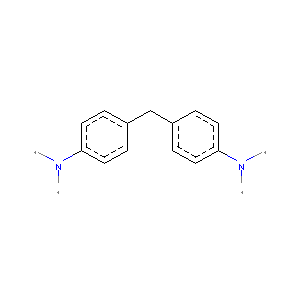

In [18]:
Draw.MolToImage(pains[0])

In [23]:
def findPains(m, substructures):
    hits = [m.HasSubstructMatch(s) for s in substructures]
    return hits

In [30]:
pHits = [findPains(m, pains) for m in mols]
#Hits

[[False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
 

In [37]:
#hasPain = [hit for hit in pHits if sum(hit)]
hasPain = [(m, hits) for m, hits in zip(mols, pHits) if sum(hits)]

hasPain

[(<rdkit.Chem.rdchem.Mol at 0x7f725f953f30>,
  [False,
   False,
   False,
   False,
   True,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   Fal

In [40]:
for mol, hits in hasPain:
    #napsat jmeno molekuly a vypsat seznam pains
    print(mol.GetProp('GENERIC_NAME'))
    for i in range(0,len(pains)):
        if hits[i] and pains[i]:
            print(pains[i].GetProp("pain_name"))

Amitriptyline
< <regId="styrene_A(13)"> >
Nortriptyline
< <regId="styrene_A(13)"> >
Phenylbutazone
< <regId="keto_keto_beta_B(12)"> >
Sulfinpyrazone
< <regId="keto_keto_beta_B(12)"> >
Chlorprothixene
< <regId="styrene_B(8)"> >
Cortisone acetate
< <regId="steroid_A(2)"> >
Zuclopenthixol
< <regId="styrene_B(8)"> >
N-Sulfo-Flavin Mononucleotide
< <regId="acyl_het_A(9)"> >
Flavin-Adenine Dinucleotide-N5-Isobutyl Ketone
< <regId="acyl_het_A(9)"> >
Oxyphenbutazone
< <regId="keto_keto_beta_B(12)"> >
2-HYDROXY-1,4-NAPHTHOQUINONE
< <regId="quinone_D(2)"> >
(3S)-3-hydroxy-1-methyl-2,3-dihydro-1H-indole-5,6-dione
< <regId="quinone_D(2)"> >
Azapropazone
< <regId="keto_keto_beta_B(12)"> >
4-(5,11-DIOXO-5H-INDENO[1,2-C]ISOQUINOLIN-6(11H)-YL)BUTANOATE
< <regId="keto_phenone_A(11)"> >
Kebuzone
< <regId="keto_keto_beta_B(12)"> >
Carbazochrome
< <regId="quinone_D(2)"> >
